In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Q2
Please follow the instructions below and inspect the outputs before you proceed. You can always check this original final to compare your results in your own copy.

In [78]:
#You have to make sure that you were able to write the file to a csv while your were working in R
house=pd.read_csv('/content/drive/MyDrive/DATA/house_prices.csv')
house.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
0,1,1976-01-01,Alabama,6.7,37.138285,0.040405
1,2,1976-02-01,Alabama,6.7,37.756437,0.051806
2,3,1976-03-01,Alabama,6.6,38.276319,0.059302
3,4,1976-04-01,Alabama,6.5,38.596135,0.059585
4,5,1976-05-01,Alabama,6.4,38.740517,0.055723


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [79]:
states = ['Michigan', 'California', 'Texas', 'Indiana']
#your code goes here

st_house = house[house['state'].isin(states)] #pull entries with states in list 'states' to st_house df
st_house[['date']] = st_house[['date']].apply(pd.to_datetime) #transforms values for 'date' in new df
                                                              #to datetime values for all entries

st_house.info() #shows datatypes of columns (datetime + ~2000 entry subset from original df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 2016 to 22175
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2016 non-null   int64         
 1   date               2016 non-null   datetime64[ns]
 2   state              2016 non-null   object        
 3   unemploy_perc      2016 non-null   float64       
 4   house_price_index  2016 non-null   float64       
 5   house_price_perc   2016 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 110.2+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

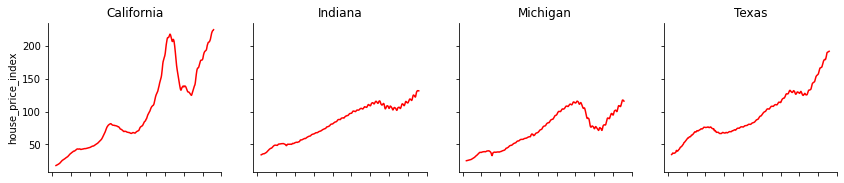

In [80]:
#your code goes here
st_grid = sns.FacetGrid(st_house, col="state") #grid w/ each state as a column
st_grid.map_dataframe(sns.lineplot, data=st_grid, x="date",
                      y="house_price_index", color="red") # 

titles = ['California','Indiana','Michigan','Texas']
for ax,title in zip(st_grid.axes.flatten(),titles): # change title of each plot to only state name
    ax.set_title(title)

for ax in st_grid.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i != 1980 | i != 2000 | i != 2020): labels[i] = '' # skip labels other than 1980, 2000, 2020 
    ax.set_xticklabels(labels) # set these labels
st_grid.set(xlabel=None) #remove 'date' title from x
plt.show()


c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


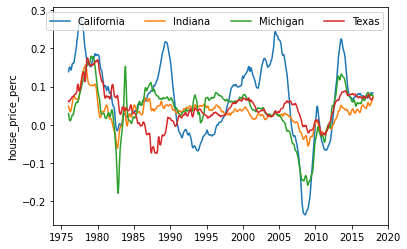

In [ ]:
#your code goes here
st_lpt = sns.lineplot(data=st_house, x="date", y="house_price_perc", hue="state")
st_lpt.set(xlabel=None) #remove 'date' title from x
plt.legend(loc="bottom", ncol=4) # for some reason it forces legend to the top
plt.show()

##Q4
Please work on your 2nd question below. Please feel free to add new code cells.

In [ ]:
#Your code goes here.
world_cup = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
world_cup.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


(a) Using Pandas groupby feature on ’Home Team Initials’ and ’Away Team Initials’ find how many times these
countries’ national teams played a match. You can use the count() after grouping. These counts will be the
weight attribute when you create your final data frame explained below.

In [106]:
team_pairs = world_cup.groupby(by=["Home Team Initials", "Away Team Initials"]).count().reset_index()
team_pairs['Weight'] = team_pairs['MatchID']

(b) Find the total goals scored by each home team for the matches played above by using groupby as earlier and
sum on the ’Home Team Goals’ column. These summations will be your HomeGoalTotal’ attribute below.

In [107]:
wc_sum = world_cup.groupby(by=["Home Team Initials", "Away Team Initials"]).sum().reset_index()
wc_sum

,Home Team Initials,Away Team Initials,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
0,ALG,AUT,1982,0,2,22000.0,0,0,293,739
1,ALG,CHI,1982,3,2,16000.0,3,0,293,740
2,ALG,ESP,1986,0,3,23980.0,0,1,308,378
3,ALG,NIR,1986,1,1,22000.0,0,1,308,379
4,ALG,RUS,2014,1,1,39311.0,0,1,255931,300186506
...,...,...,...,...,...,...,...,...,...,...
656,YUG,UAE,1990,4,1,27833.0,2,1,322,364
657,YUG,URU,1962,3,1,8829.0,2,1,231,1564
658,YUG,ZAI,1974,9,0,31700.0,6,0,262,2186
659,ZAI,BRA,1974,0,3,36200.0,0,1,262,1987


In [109]:
team_pairs['Home Goal Total'] = wc_sum['Home Team Goals']

(c) Use the values you found above, come up with a new data frame called team_pairs which has ’Home Team
Initials’, ’Away Team Initials’, ’weight’, ’HomeGoalTotal’ columns where latter two columns should have the values
from your earlier steps.


In [113]:
team_pairs = team_pairs[['Home Team Initials', 'Away Team Initials', 'Weight', 'Home Goal Total']]
team_pairs

,Home Team Initials,Away Team Initials,Weight,Home Goal Total
0,ALG,AUT,1,0
1,ALG,CHI,1,3
2,ALG,ESP,1,0
3,ALG,NIR,1,1
4,ALG,RUS,1,1
...,...,...,...,...
656,YUG,UAE,1,4
657,YUG,URU,1,3
658,YUG,ZAI,1,9
659,ZAI,BRA,1,0


(d) Write your team_pairs to a csv file by using Pandas to_csv feature. (Please ignore the fact that there may be
symmetric pairs such as ARG-BRA and BRA-ARG in your data frame. Please proceed what you have for the sake
of simplicity. If you can consolidate them, you can get 5 points bonus.)

In [118]:
team_pairs.to_csv("./drive/My Drive/team_pairs.csv")

Make sure that you only write four columns ('Home Team Initials', 'Away Team Initials', 'weight', 'HomeGoalTotal') from the data frame, team_pairs, to a csv file